In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
f = np.array([8, 2, 8, 3, 5, 6, 5, 15], dtype=np.float64)
 
np.gradient(f)

array([-6. ,  0. ,  0.5, -1.5,  1.5,  0. ,  4.5, 10. ])

In [4]:
print(f[1] - f[0], f[-1] - f[-2])

4.0 11.0


In [7]:
(f[2] - f[0])/2 # 5.5
(f[3] - f[1])/2 # 8.0
(f[4] - f[2])/2 # 11.0
(f[5] - f[3])/2 # 12.0

12.0

In [14]:
step = 7
np.gradient(f, step)

array([-0.85714286,  0.        ,  0.07142857, -0.21428571,  0.21428571,
        0.        ,  0.64285714,  1.42857143])

In [15]:
for i in range(1, len(f) - 1):
    print((f[i + 1] - f[i - 1])/(2*step))

0.0
0.07142857142857142
-0.21428571428571427
0.21428571428571427
0.0
0.6428571428571429


### Градиентный спуск

In [1]:
def fun(x, y, a=1, b=1):
    return a * (x ** 2) + b * (y ** 2)

In [2]:
def grad(x, y, a=1, b=1):
    return np.array([2 * a * x, 2 * b * y])

In [3]:
def grad_descend(grad, step_size=0.2, num_steps=30):
    lst = []
    x = np.random.uniform(0, 3, size = 2)
    lst.append(x)
    for i in range(num_steps):
        x = x - step_size * grad(lst[-1][0], lst[-1][1])
        lst.append(x)
    return np.array(lst)

In [6]:
def plot_grad(fun, trace):
    fig = plt.figure(figsize=(10, 8))
    x_ = np.linspace(-1, 1, 100)
    y_ = np.linspace(-1, 1, 100)
    x, y = np.meshgrid(x_, y_)
    z = fun(x, y)
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(x, y, z, alpha=0.6)
    ax.contour(x, y, z, zdir='z', offset=z.min())
    z_trace = fun(trace[:, 0], trace[:, 1])
    ax.plot(trace[:, 0], trace[:, 1], z_trace, "o-")
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min(), y.max())
    ax.set_zlim(z.min(), z.max())

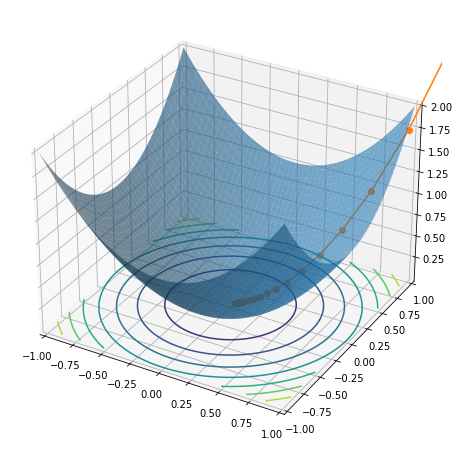

In [7]:
trace = grad_descend(grad, 0.1, 20)
plot_grad(fun, trace = trace)